In [2]:
import cv2
import time

TIMER = int(3)
webcam = cv2.VideoCapture(0)
while True:
    ret, img = webcam.read()
    cv2.imshow('a', img)
    k = cv2.waitKey(125)
    if k == ord('q'):
        prev = time.time()
        while TIMER >= 0:
            ret, img = webcam.read()
            font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
            cv2.putText(img, str(TIMER),(200, 250), font, 7, (0, 255, 255), 4, cv2.LINE_AA)
            cv2.imshow('a', img)
            cv2.waitKey(125)
            cur = time.time()
            if cur-prev >= 1:
                prev = cur
                TIMER -= 1
        else:
            ret, img = webcam.read()
            cv2.imshow('a', img)
            cv2.waitKey(2000)
            cv2.imwrite('captured_images/digit_image.jpg', img)
    elif k == 27:
        break
webcam.release()
cv2.destroyAllWindows()

In [3]:
# Import Matplotlib
from matplotlib import pyplot as plt 

In [4]:
# Import Python Imaging Library - PIL
from PIL import Image
testImage = Image.open('captured_images/digit_image.jpg')

In [5]:
# Convert Image
grayImage = testImage.convert('L')

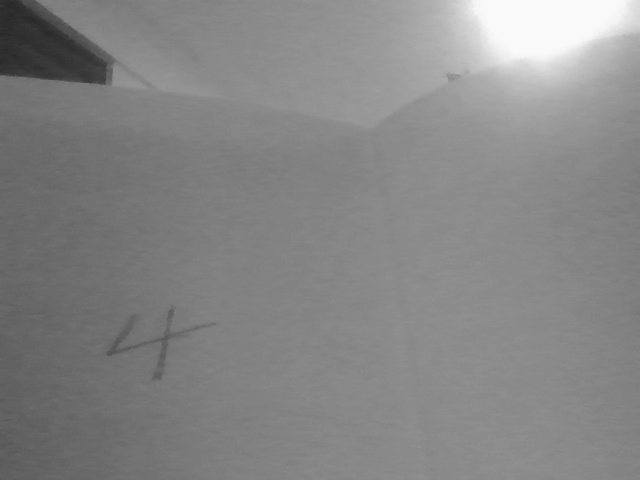

In [6]:
grayImage

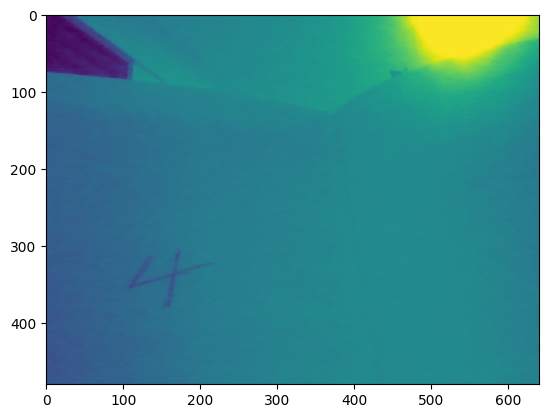

In [7]:
# Plot Image using Matplotlib
plt.imshow(grayImage)
plt.show()

In [177]:
# Use Lambda function to get grayimage

In [8]:
image = grayImage.point(lambda x: 0 if x < 100 else 255, '1')

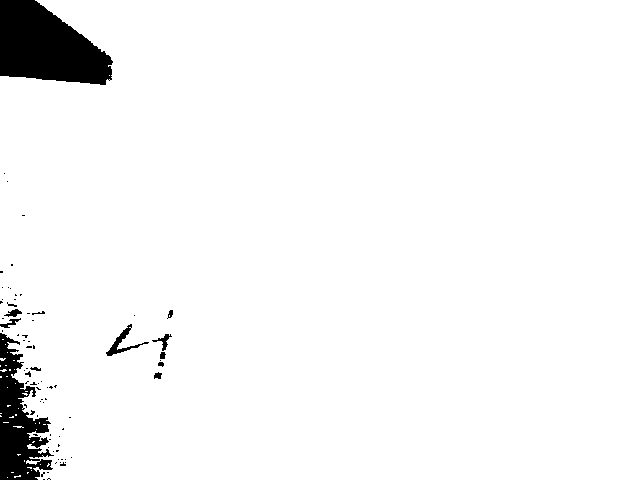

In [9]:
image

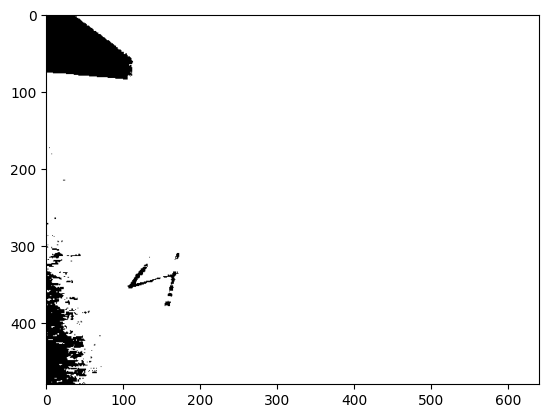

In [10]:
plt.imshow(image)

In [11]:
# Save image
image.save('captured_images/gray_image.jpg')

In [12]:
# Use cv2 to change image 
new_image = cv2.imread('captured_images/gray_image.jpg', cv2.IMREAD_GRAYSCALE)
new_image = cv2.bitwise_not(new_image)

In [13]:
new_image.shape

(480, 640)

In [14]:
new_image = cv2.resize(new_image, (28,28))

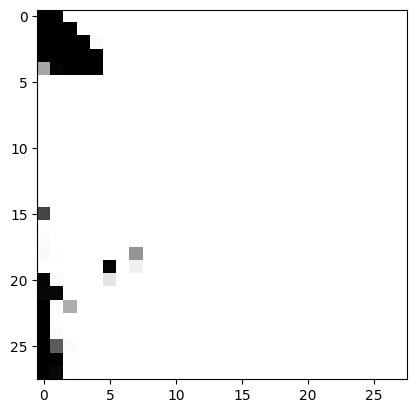

In [15]:
plt.imshow(new_image, plt.cm.binary)

In [16]:
new_image.shape

(28, 28)

In [17]:
import tensorflow as tf

In [20]:
final_image = tf.keras.utils.normalize(new_image, axis=1)

In [21]:
final_image

array([[0.70710678, 0.70710678, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.57735027, 0.57735027, 0.57735027, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.49998462, 0.49998462, 0.49998462, 0.49998462, 0.0078429 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
# Import ANN Model
import keras
my_model = keras.models.load_model('savedmodel.h5')

In [23]:
final_image.shape

(28, 28)

In [24]:
prediction = my_model.predict([final_image])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(28, 28), dtype=float32). Expected shape (None, 28, 28), but input has incompatible shape (28, 28)[0m

Arguments received by Sequential.call():
  • inputs=('tf.Tensor(shape=(28, 28), dtype=float32)',)
  • training=False
  • mask=('None',)

In [193]:
my_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               100480    
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
